In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

In [2]:
url = 'https://raw.githubusercontent.com/PoornimasreJegannathan/Poorni/main/copin_modi_final.csv'
copin = pd.read_csv(url)
copin.head()

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
2,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
3,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
4,E7039921-5DE1-4FD1-93A3-C25F9C389B82,2021-04-01,32.235317,30202362.0,27.0,Won,S,10.0,0.60,1010.0,DC04EK,628377,2021-07-01,973.00


In [5]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# cols = ['id','status', 'item_type','material_ref']
cols = ['id','quantity_tons', 'item_type', 'thickness', 'width','material_ref','product_ref','selling_price']
# Encode labels of multiple columns at once
copin[cols] = copin[cols].apply(le.fit_transform)


In [6]:
copin.head()

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price
0,19515,2021-04-01,13230,30156308.0,28.0,Won,4,10.0,170,817,5099,20,2021-07-01,917
1,18581,2021-04-01,20215,30153963.0,30.0,Won,5,28.0,15,293,9188,5,2021-01-01,343
2,20600,2021-04-01,19102,30349574.0,32.0,Won,3,59.0,186,645,5367,18,2021-01-01,660
3,6409,2021-04-01,20835,30211560.0,28.0,Won,4,10.0,284,1013,1817,8,2021-03-01,208
4,19060,2021-04-01,9686,30202362.0,27.0,Won,3,10.0,40,349,5002,5,2021-07-01,1320


In [35]:
y = copin['status']
sta_count = y.value_counts()
sta_count
print(y.shape)

(21197,)


In [37]:
copin_encoded_all = copin.copy()

In [38]:
copin_encoded_all.head()

,id,item_date,quantity_tons,customer,country,status,item_type,application,thickness,width,material_ref,product_ref,delivery_date,selling_price
0,19515,2021-04-01,13230,30156308.0,28.0,Won,4,10.0,170,817,5099,20,2021-07-01,917
1,18581,2021-04-01,20215,30153963.0,30.0,Won,5,28.0,15,293,9188,5,2021-01-01,343
2,20600,2021-04-01,19102,30349574.0,32.0,Won,3,59.0,186,645,5367,18,2021-01-01,660
3,6409,2021-04-01,20835,30211560.0,28.0,Won,4,10.0,284,1013,1817,8,2021-03-01,208
4,19060,2021-04-01,9686,30202362.0,27.0,Won,3,10.0,40,349,5002,5,2021-07-01,1320


In [50]:
# X = copin[['id','quantity_tons', 'item_type', 'thickness', 'width','material_ref','product_ref','selling_price']].values
Xe = copin_encoded_all[[ 'thickness', 'width','material_ref','product_ref','selling_price']].values
ye = copin_encoded_all['status']
print(Xe.shape)
print(ye.shape)


(21197, 5)
(21197,)


(34332, 5)
(34332,)


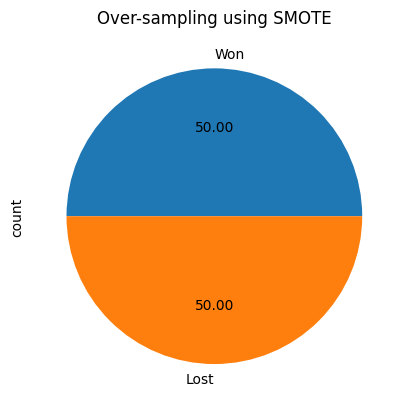

In [61]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()  # Create an instance of SMOTE
Xsm,ysm = smote.fit_resample(Xe, ye)
X=Xsm
y=ysm
print(Xsm.shape)
print(ysm.shape)
ax = ysm.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling using SMOTE")

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
x_train,x_test,y_train,y_test = train_test_split(Xsm,ysm,stratify=y)
print(x_train.shape)
print(x_test.shape)

(25749, 5)
(8583, 5)


In [55]:
model= DecisionTreeClassifier(criterion="gini", max_depth = 4,random_state=0)
model.fit(X,y)
y_predict= model.predict(x_test)
y_predict

array(['Lost', 'Won', 'Won', ..., 'Lost', 'Won', 'Lost'], dtype=object)

In [56]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.6256553652569031


col_0,Lost,Won
status,,
Lost,2536,1755
Won,1458,2834


In [57]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        Lost       0.63      0.59      0.61      4291
         Won       0.62      0.66      0.64      4292

    accuracy                           0.63      8583
   macro avg       0.63      0.63      0.63      8583
weighted avg       0.63      0.63      0.63      8583



In [58]:
z=model.predict([[400,100,1000,15,1000]])

In [59]:
print(z)

['Lost']
